In [1]:
from pandas_datareader import data as pdr
#import yfinance as yf
#yf.pdr_override()
import matplotlib.pyplot as plt

In [2]:
kospi = pdr.get_data_yahoo('^KS11', '2004-01-04') #KOSPI DATA
window = 252 #Approximately 252 days stock market movement in a year
peak = kospi['Adj Close'].rolling(window, min_periods=1).max() #KOSPI of Adj Close max price period of year
drawdown = kospi['Adj Close']/peak - 1.0 # Calculate KOSPI drawdown
max_dd = drawdown.rolling(window,min_periods=1).min() #Period of a year in drawdown minimum

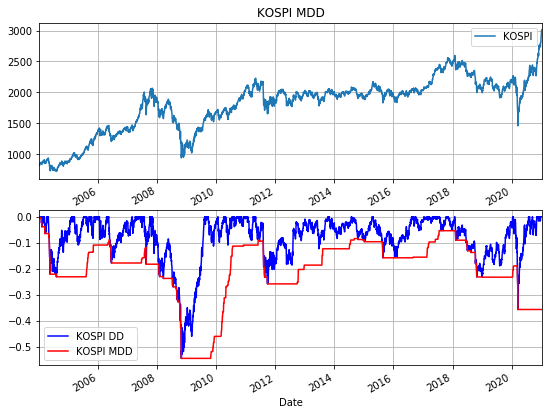

In [3]:
plt.figure(figsize=(9,7))
plt.subplot(211)
kospi['Close'].plot(label='KOSPI', title='KOSPI MDD', grid=True, legend=True)
plt.subplot(212)
drawdown.plot(c='blue', label='KOSPI DD', grid=True, legend=True)
max_dd.plot(c='red', label='KOSPI MDD', grid=True, legend=True)
plt.show()

In [4]:
max_dd.min()
#max_dd[max_dd==-0.5453665130144085]

-0.5453665130144085

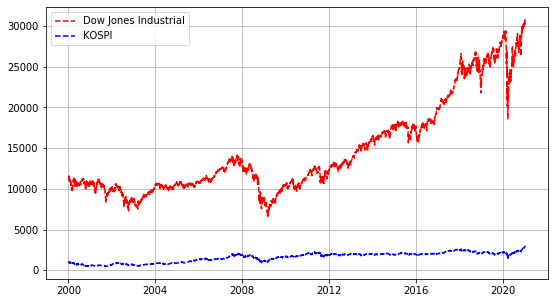

In [5]:
from pandas_datareader import data as pdr
import matplotlib.pyplot as plt

dow = pdr.get_data_yahoo('^DJI', '2000-01-04') #DOW
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04') #KOSPI

plt.figure(figsize=(9,5))
plt.plot(dow.index, dow.Close, 'r--', label="Dow Jones Industrial")
plt.plot(kospi.index, kospi.Close, 'b--', label="KOSPI")
plt.grid(True)
plt.legend(loc='best')
plt.show()

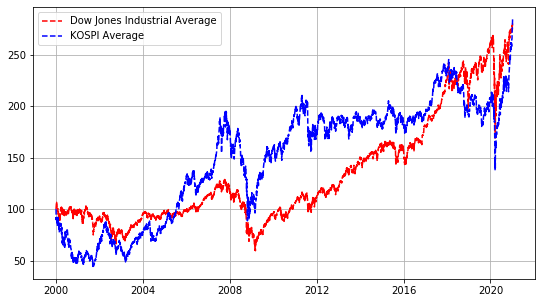

In [6]:
d = (dow.Close / dow.Close.loc['2000-01-04']) * 100
k = (kospi.Close / kospi.Close.loc['2000-01-04']) * 100

plt.figure(figsize=(9,5))
plt.plot(d.index, d, 'r--', label="Dow Jones Industrial Average")
plt.plot(k.index, k, 'b--', label="KOSPI Average")
plt.grid(True)
plt.legend(loc='best')
plt.show()

In [9]:
len(dow), len(kospi)

(5286, 5172)

In [17]:
import pandas as pd
#plt.scatter(dow, kospi, marker='.')
df = pd.DataFrame({'DOW': dow['Close'], 'KOSPI': kospi['Close']})
df

,DOW,KOSPI
Date,,
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
2000-01-10,11572.200195,987.239990
...,...,...
2020-12-31,30606.480469,NaN
2021-01-04,30223.890625,2944.449951
2021-01-05,30391.599609,2990.570068


In [23]:
#plt.scatter(df['DOW'], df['KOSPI'], marker='.')
df = df.fillna(method='bfill')
df

,DOW,KOSPI
Date,,
2000-01-04,10997.929688,1059.040039
2000-01-05,11122.650391,986.309998
2000-01-06,11253.259766,960.789978
2000-01-07,11522.559570,948.650024
2000-01-10,11572.200195,987.239990
...,...,...
2020-12-31,30606.480469,2944.449951
2021-01-04,30223.890625,2944.449951
2021-01-05,30391.599609,2990.570068


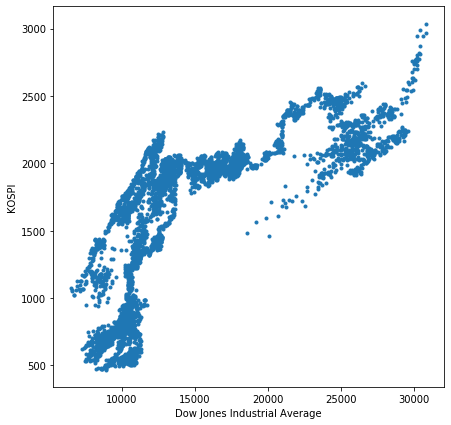

In [25]:
import pandas as pd
from pandas_datareader import data as pdr

dow = pdr.get_data_yahoo('^DJI', '2000-01-04')
kospi = pdr.get_data_yahoo('^KS11', '2000-01-04')

df = pd.DataFrame({'DOW' : dow['Close'], 'KOSPI': kospi['Close']})
df = df.fillna(method='bfill')
df = df.fillna(method='ffill')

import matplotlib.pyplot as plt
plt.figure(figsize=(7,7))
plt.scatter(df['DOW'], df['KOSPI'], marker='.')
plt.xlabel('Dow Jones Industrial Average')
plt.ylabel('KOSPI')
plt.show()